In [1]:
import pickle

with open('../outputs/results/params_list.pkl', 'rb') as f:
    params_list = pickle.load(f)
with open('../outputs/results/metrics_list.pkl', 'rb') as f:
    metrics_list = pickle.load(f)

def condense_dictionaries(dicts):
    condensed = {}
    for d in dicts:
        for key, value in d.items():
            if key not in condensed:
                condensed[key] = []
            condensed[key].append(value)
    return condensed

params_dict = condense_dictionaries(params_list)
keys = ['max_depth', 'learning_rate', 'subsample', 'colsample_bytree']
params_dict = {key: params_dict[key] for key in keys}

In [4]:
import pandas as pd

results = pd.DataFrame(params_dict)
results['gini'] = metrics_list

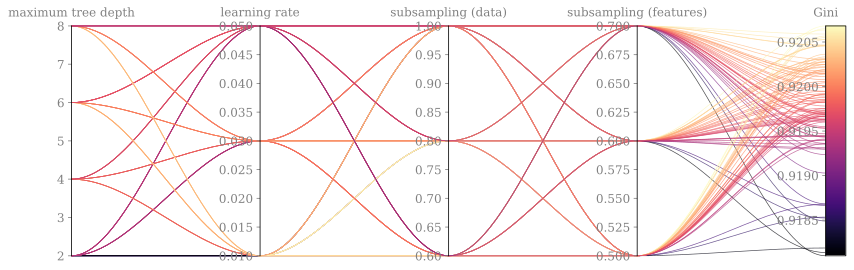

In [5]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

plt.rc('font', family='serif')
plt.rc('ytick', direction='out', color='gray')
plt.rc('xtick', direction='out', color='gray')
plt.rcParams.update({'font.size': 12})

from par_coordinates import plot_par_coordinates

fig = plot_par_coordinates(results, labels=["maximum tree depth", "learning rate", 
                           "subsampling (data)", "subsampling (features)", "Gini"], figsize=(14, 4), curves=True, 
                           linewidth=0.7, alpha=0.7, cmap=plt.get_cmap("magma"))
fig.savefig('../outputs/figures/par_coord.pdf', dpi=300, bbox_inches='tight')

In [6]:
results.sort_values(by='gini', ascending=False).head(20)

,max_depth,learning_rate,subsample,colsample_bytree,gini
57,6,0.01,0.8,0.5,0.920681
84,8,0.01,0.8,0.5,0.920650
85,8,0.01,0.8,0.6,0.920635
86,8,0.01,0.8,0.7,0.920590
54,6,0.01,0.6,0.5,0.920568
81,8,0.01,0.6,0.5,0.920550
56,6,0.01,0.6,0.7,0.920529
87,8,0.01,1.0,0.5,0.920528
59,6,0.01,0.8,0.7,0.920466
55,6,0.01,0.6,0.6,0.920464
